In [111]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [154]:
t_nu = {
    22.6: [497, 750, 992,  1230, 1478, 1720],
    30:   [500, 742, 1000, 1250, 1490, 1740],
    35.4: [506, 754, 1010, 1257, 1520, 1756],
    45:   [520, 770, 1030, 1270, 1520, 1780],
    47.5: [525, 780, 1031, 1280, 1535, 1785],
    50:   [528, 780, 1032, 1283, 1542, 1800]
}

In [155]:
len_0 = len (list(t_nu.values())[0])

for value in t_nu.values():
    assert (len(value) == len_0)

common_len = len_0

In [156]:
for idx in range (common_len):
    print (f"{idx + 1}\t", end="")
    for temp, nus in t_nu.items():
        print (f"&\t{nus[idx]:4.0f}\t", end="")
    
    print (f"\\\ \\hline")

1	&	 497	&	 500	&	 506	&	 520	&	 525	&	 528	\\ \hline
2	&	 750	&	 742	&	 754	&	 770	&	 780	&	 780	\\ \hline
3	&	 992	&	1000	&	1010	&	1030	&	1031	&	1032	\\ \hline
4	&	1230	&	1250	&	1257	&	1270	&	1280	&	1283	\\ \hline
5	&	1478	&	1490	&	1520	&	1520	&	1535	&	1542	\\ \hline
6	&	1720	&	1740	&	1756	&	1780	&	1785	&	1800	\\ \hline


In [159]:
def data_plot(temp: float, freqs: list, fig, marker):
    # preparing data
    diff_freqs  = np.array (list(map (lambda freq: freq - freqs[0], freqs))[1:])
    resonanses_nums = np.arange(1, len(diff_freqs) + 1, 1).reshape(-1, 1)

    # fit the model
    model = LinearRegression().fit(resonanses_nums, diff_freqs)
    
    # creating lines data and counts inaccuracies
    x_line_data = np.arange(1, len(diff_freqs)+0.1, 0.1).reshape(-1, 1)
    y_line_data = model.predict (x_line_data)

    test_data = model.predict (resonanses_nums)
    model_inaccuracy = (1 / len (test_data))* np.sqrt(mean_squared_error(test_data, diff_freqs))
    
    plt.plot(x_line_data, y_line_data)
    plt.scatter (resonanses_nums, diff_freqs, marker=marker, label=f"T = {temp}°C")

    return model.coef_[0], model_inaccuracy


[(22.6, 242.60000000000005, 0.40398019753448583), (30, 248.60000000000002, 0.8371379814582524), (35.4, 251.39999999999995, 1.056787585089828), (45, 251.0, 0.938083151964686), (47.5, 251.39999999999998, 0.24), (50, 255.0, 0.5153639490690004)]


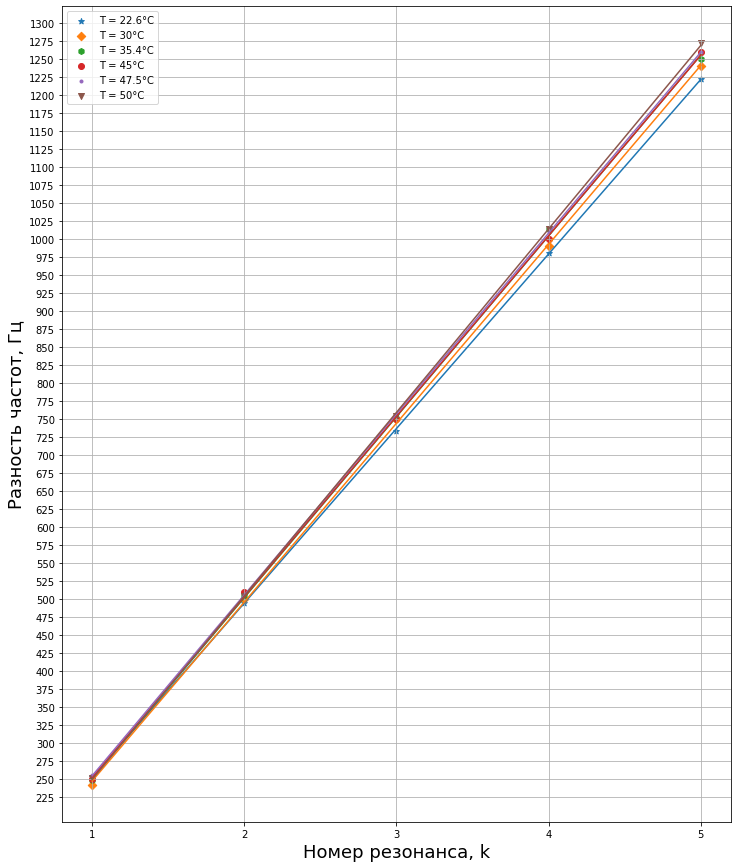

In [160]:
# setting up graph

fig = plt.figure(figsize=(12, 15))
plt.grid()
plt.xlabel("Номер резонанса, k", fontdict = {'family' : 'normal', 'size': 18})
plt.xticks(np.arange(0, 7, 1))

plt.ylabel("Разность частот, Гц", fontdict = {'family' : 'normal',  'size': 18})
plt.yticks(np.arange(225, 1350, 25))

markers = ["*", "D", "h", "o", ".", "v"]
model_coefs = list()
for i, item in enumerate(t_nu.items()):
    temp, freqs = item
    model_coef, inacc = data_plot (temp, freqs, fig, markers[i])
    model_coefs.append((temp, model_coef, inacc))

plt.legend()
plt.savefig ("freqs_to_resonances.png")
print (model_coefs)

In [169]:
for temp, coef, inacc in model_coefs:
    print (f"${temp:3.1f}$", end = " & ")
print ("\\\ \\hline")

for temp, coef, inacc in model_coefs:
    print (f"${coef:3.2f} \pm {(inacc):1.2f}$", end = " & ")
print ("\\\ \\hline")

$22.6$ & $30.0$ & $35.4$ & $45.0$ & $47.5$ & $50.0$ & \\ \hline
$242.60 \pm 0.40$ & $248.60 \pm 0.84$ & $251.40 \pm 1.06$ & $251.00 \pm 0.94$ & $251.40 \pm 0.24$ & $255.00 \pm 0.52$ & \\ \hline


In [181]:
air_molar_mass  = 28.98 * 10**-3 # kg / mol
R               = 8.314         # J / (K * mol)
L               = 700   * 10**-3 # meters
L_inacc         = 1     * 10**-3 # meters
gammas = list()

for temp, coef, coef_inacc in model_coefs:
    speed_of_sound = (coef * 2 * L)
    temp_in_kelvins = temp + 273.15
    gamma = (air_molar_mass * speed_of_sound ** 2) / (R * temp_in_kelvins)
    sound_speed_inacc =  coef_inacc * L + L_inacc * coef
    sound_speed_square_inacc = 2 * sound_speed_inacc * speed_of_sound
    gamma_inacc = (air_molar_mass / (R * temp_in_kelvins)) * sound_speed_square_inacc

    gammas.append ((gamma, gamma_inacc))

for temp, coef, score in model_coefs:
    print (f"${temp:3.1f}$", end = " & ")
print ("\\\ \\hline")

for gamma, inacc in gammas:
    print (f"${gamma:1.4f}$", end = " & ")
print ("\\\ \\hline")

for gamma, inacc in gammas:
    print (f"$\pm {inacc:1.4f}$", end = " & ")
print ("\\\ \\hline")

gammas = np.array(gammas)
mean_value, mean_inacc = np.mean (gammas, axis=0)

print (f"$\gamma = {mean_value:1.4f} \pm {mean_inacc:1.4f}$")
print (f"$\\varepsilon = {(mean_inacc / mean_value):1.4f}$")

$22.6$ & $30.0$ & $35.4$ & $45.0$ & $47.5$ & $50.0$ & \\ \hline
$1.3596$ & $1.3928$ & $1.3994$ & $1.3529$ & $1.3466$ & $1.3747$ & \\ \hline
$\pm 0.0042$ & $\pm 0.0067$ & $\pm 0.0079$ & $\pm 0.0070$ & $\pm 0.0032$ & $\pm 0.0047$ & \\ \hline
$\gamma = 1.3710 \pm 0.0056$
$\varepsilon = 0.0041$
